In [1]:
import lck_tools as lck

from tc3omega.datareader import Data  # reads data from .csv
from tc3omega.constants import Constants  # read sample data from .yml
from tc3omega.analysis import Analyzer  # fits linear approx. or 2D model
from tc3omega.logmaker import Logmaker  # creates plots and log files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import serial

direc = r'C:/Users/Pedro/Dropbox/1-Three Omega with Ara/new_python/3omega-lockin-Pedro/TARA8'
direc = lck.create_folder('TARA8_Scan2-2019-08-22',direc)

In [2]:
lclist=[ 500,  750, 1000, 1250, 1600, 2000, 2500, 3000, 3700]

output = lck.fullScan(lclist,20000,30,scan_v_or_f='freq',stb_time=9,averaged_time=3,n_sweeps=20,lc_const=[3],direc=direc)

make sure BNCs are set to sample
Starting sweep number: 1
Voltage: 3
estimated time for scan: 108 seconds

scanning whole range

For:   500Hz
x:
[6.847419e-04 6.923713e-04 6.980933e-04 7.038154e-04 7.095374e-04
 7.114448e-04 7.152595e-04 7.171668e-04 7.171668e-04 7.171668e-04
 7.152595e-04 7.114448e-04 7.076301e-04 7.019080e-04 6.980933e-04
 6.904639e-04 6.847419e-04 6.771125e-04 6.713904e-04 6.637610e-04
 6.561317e-04 6.485023e-04 6.389655e-04 6.294288e-04 6.198920e-04
 6.065406e-04 5.931892e-04 5.779304e-04 5.607642e-04 5.416907e-04
 5.245246e-04 5.054511e-04 4.863758e-04 4.653949e-04 4.463214e-04
 4.253406e-04 4.081745e-04 3.910083e-04 3.738422e-04 3.566761e-04
 3.414173e-04 3.261585e-04 3.108997e-04 2.937336e-04 2.784748e-04
 2.632160e-04 2.498645e-04 2.346048e-04 2.193460e-04 2.059946e-04
 1.926431e-04 1.792917e-04 1.678476e-04 1.564035e-04 1.449594e-04
 1.335153e-04 1.239786e-04 1.163487e-04 1.068120e-04 1.010899e-04
 9.346055e-05 8.964585e-05 8.583115e-05 8.201646e-05 8.010911e-

KeyboardInterrupt: 

In [ ]:
lck.beep()
lck.beep()
lck.beep()

In [6]:
title4ara = ['freq','Vs_3w','Vs_1w','Vs_1w_o','Vsh_1w']
title4ped = ['freq','v3w','v3w_avg','v1w','v1w_sh','volt']

data4ara = output[0]
data4ped = [output[i] for i in range(1,len(output))]

lck.csv_writer('TARA8-SiOx-5',data4ara,title4ara,direc=direc)
lck.csv_writer('TARA8-SiOx-5_analysis',data4ped,title4ped,direc=direc)

direc = r'C:\Users\Pedro\Dropbox\1-Three Omega with Ara\new_python\3omega-lockin-Pedro\Ara_tc3omega\TARA8'

lck.csv_writer('TARA8-SiOx-5',data4ara,title4ara,direc=direc)
lck.csv_writer('TARA8-SiOx-5_analysis',data4ped,title4ped,direc=direc)

<ErrorbarContainer object of 3 artists>

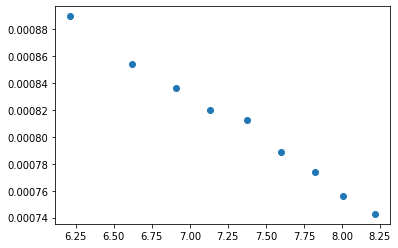

In [7]:
freq = data4ara[0]
v3w = data4ara[1]

fig = plt.figure()
plt.errorbar(np.log(freq),v3w,fmt='o')



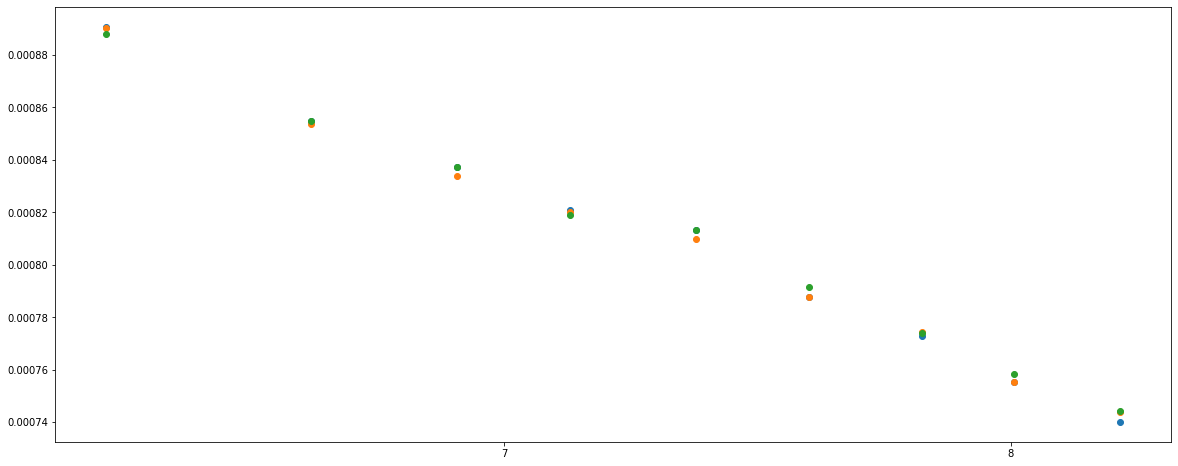

In [23]:
v3w = data4ped[1]
v3 = np.array([])
for v in v3w:
    if v != 0 and v != np.isnan(v):
        v3 = np.append(v3,v)
num_points = len(freq)
n_sweeps = int(len(v3)/num_points)

fig = plt.figure(figsize=(20,8))
plt.xticks(range(num_points))
for sweep in range(n_sweeps):
    plt.errorbar(np.log(freq),v3[sweep*num_points:(sweep + 1)*(num_points)],fmt='o')

fitted thermal conductivities for layers
['silicon_oxide1', 'silicon', 'silicon_oxide2']:

fitted values of these layers:
[ 1.29429844 56.37153911  1.29429844]

calculation time: 8.96 (s)

fit residual:  1.4177585457147869e-08
film thermal conductivity: 1.43

substrate thermal conductivity: 57.61



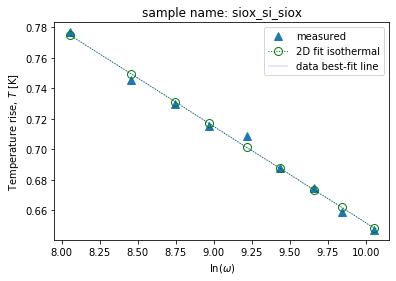

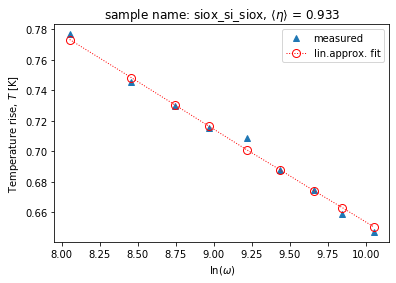

In [41]:
from tc3omega.datareader import Data
from tc3omega.constants import Constants
from tc3omega.analysis import Analyzer
from tc3omega.logmaker import Logmaker
import os
os.chdir(direc)
kappas0 = np.array([1.5, 130., 1.5], dtype=np.double)  # use np.double!
fit_indices = [0, 1, 2]


constants = Constants.fromFile('siox_si_siox.txt').getvals()
data = Data('TARA8-SiOx-5.csv')
constants['heater_dRdT']= 0.09
A = Analyzer(constants, data, kappas0, fit_indices,
             boundary_typ='isothermal', use_substrate_guess=True)

eq_layers = [(0,2)]

fit_kappas = A.MCfit2D(N=100, equivalent_layers=eq_layers)

print('2D Model: ')
print("fitted thermal conductivities for layers\n{}:"
      .format(A.layer_names))
print()
print("fitted values of these layers:\n{}"
      .format(fit_kappas))
print()
print("fit residual: ", A.F_last)
print()
print()
print()
LogA = Logmaker(A)

# plot latest result in 'A'
LogA.make_MCfit_plot()

k_film, k_sub = A.LinApproxFit(const_eta=None)
print("Linear approximation:  ")
print("film thermal conductivity: {:.2f}".format(k_film))
print()
print("substrate thermal conductivity: {:.2f}".format(k_sub))
print()
LogA = Logmaker(A)
LogA.make_LAfit_plot()